In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from functions_flutter import func, matrices
# Assuming the matrices() and func() functions have been defined previously in Python

In [114]:
# DATA
DATA = {
    'C': 18.288,  # Wing chord
    'kh': 9.9818e+3,  # Linear plunge spring stiffness
    'kt': 1.614834e+6,  # Linear pitching spring stiffness
    'm': 12879.8,  # Mass per unit length
    'Ip': 6.7005e+5,  # Wing mass moment of inertia
    'dh': 0,  # Plunge damping coefficient
    'dt': 0,  # Pitching damping coefficient
    'khc': 0,  # Cubic plunge spring stiffness
    'ktc': 1.5 * 1.614834e+6,  # Cubic pitching spring stiffness, adjusted from DATA['kt']
    'xs': 1.0,  # Elastic axis dimensionless distance from the leading edge
    'xa': 0,  # Distance between the elastic axis and mass center
    # 'U': 48.92,  # Free-stream velocity
    'U': 48.93,  # Free-stream velocity Flutter
    # 'U': 50.0,  # Free-stream velocity

    'Rhoinf': 1.225,  # Air density
}

# Dimensionless quantities
Wh = np.sqrt(DATA['kh'] / DATA['m'])
Wt = np.sqrt(DATA['kt'] / DATA['Ip'])


In [115]:
DATA.update({
    'Xi_h': DATA['dh'] / (2 * np.sqrt(DATA['m'] * DATA['kh'])),
    'Xi_a': DATA['dt'] / (2 * np.sqrt(DATA['Ip'] * DATA['kt'])),
    'mu': DATA['m'] / (np.pi * DATA['Rhoinf'] * (DATA['C'] / 2) ** 2),
    'ra': np.sqrt(DATA['Ip'] / (DATA['m'] * (DATA['C'] / 2) ** 2)),
    'ah': DATA['xs'] - 1,
    'Omb': Wh / Wt,
    'Beta': DATA['ktc'] / DATA['kt'],
    'Gamma': DATA['khc'] / DATA['kh'],
    'Uinf': DATA['U'] / (DATA['C'] / 2 * Wt),
    'Psi1': 0.165,
    'Psi2': 0.335,
    'Eps1': 0.0455,
    'Eps2': 0.3,
})

In [116]:
# NUM
NUM = {
    'DT': 0.01,  # Time step
    'TFinal': 4000,  # Simulation time
    'CI': [0, 1 * np.pi / 180, 0, 0],  # Initial conditions
}

In [117]:
# Solution procedure
Tspan = (0, NUM['TFinal'])
CInitial = NUM['CI'] + [0, 0, 0, 0]

Term = matrices(DATA)  # Assuming the matrices function is defined

def ode_system(t, Z):
    return func(t, Z, DATA, Term, NUM)  # Assuming the func function is defined

solution = solve_ivp(ode_system, Tspan, CInitial, method='RK45',
                     t_eval=np.arange(Tspan[0], Tspan[1]+NUM['DT'], NUM['DT']))

In [118]:
# RESPONSE
RESPONSE = {
    'Time': solution.t * DATA['C'] / 2 / DATA['U'],
    'Plunge': solution.y[0] * DATA['C'] / 2,
    'Pitching': solution.y[1] * 180 / np.pi,
    'DPlunge': solution.y[2] * (DATA['C'] / 2) ** 2 / DATA['U'],
    'DPitching': solution.y[3] * 180 / np.pi * DATA['C'] / 2 / DATA['U'],
}

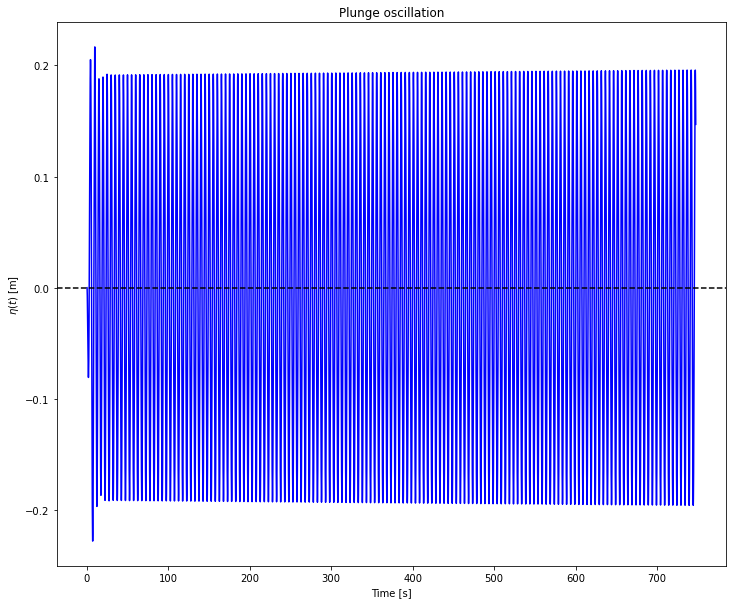

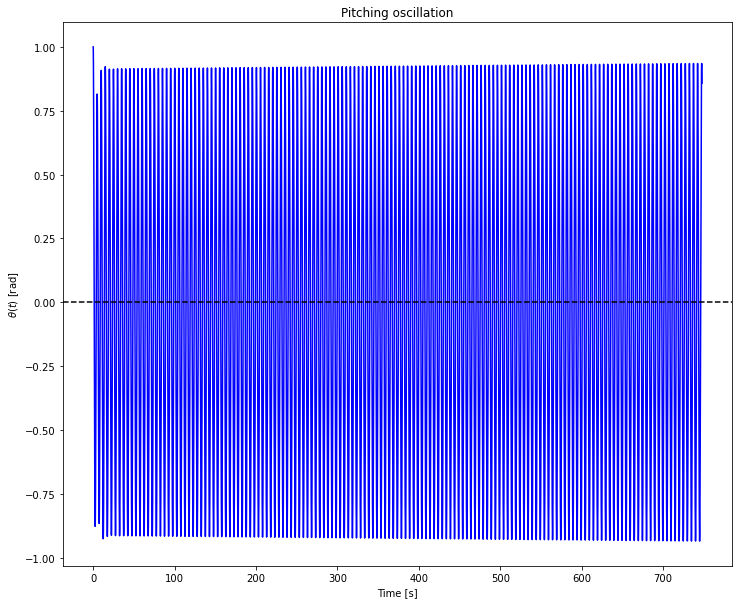

In [119]:
# Plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(1)
plt.plot(RESPONSE['Time'], RESPONSE['Plunge'], color='b')
plt.axhline(0, color='k', linestyle='--')
plt.title('Plunge oscillation')
plt.xlabel('Time [s]')
plt.ylabel(r'$\eta (t)$ [m]')
fig.savefig('./figures/Plunge oscillation.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show()
# plt.xlim(0, 1000)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(2)
plt.plot(RESPONSE['Time'], RESPONSE['Pitching'], color='b')
plt.axhline(0, color='k', linestyle='--')
plt.title('Pitching oscillation')
plt.xlabel('Time [s]')
plt.ylabel(r'$\theta (t)$ [rad]')
fig.savefig('./figures/Pitching oscillation.pdf', dpi = 200, transparent=False, bbox_inches='tight')
# plt.xlim(0, 1000)
plt.show()

# flutter_frequency = 

# Flutter frequency

#Measuere distanse between two peaks * 2*pi

#Below flutter, dampen, above, increase

#Limit cycle oscilattion for a supercritical free-stream velocity
#Critical: Frestream velocity where we have flutter.
#Sub vritical for velcoity lower than flutter.
#Supercritical velocity when free stream velocity is higher thna fluter speed. 

#Limit cycle
#Diforcation diagram h vs h* (H = plunge, h* = dplunge)


#Bifurcation curve
#y = amplitude(h), x = free stream velocity 
#max value in last part of signal. Discount begining


### Flutter frequency

In [120]:
#0.2
t = RESPONSE['Time']
y = RESPONSE['Plunge']
# y = RESPONSE['Pitching']

y_fft = np.fft.fft(y)
n = len(y_fft)
frequency_samples = np.fft.fftfreq(n, d=(t[1]-t[0]))  # d is the sample spacing
# Magnitude of FFT
magnitude = np.abs(y_fft)

# Only take the half of the frequencies (symmetry in FFT of real signals)
positive_frequencies = frequency_samples[:n//2]
positive_magnitude = magnitude[:n//2]

# Find the peak frequency
peak_frequency = positive_frequencies[np.argmax(positive_magnitude)]
print(f"Peak frequency: {peak_frequency} Hz")

# print(frequency_samples)

Peak frequency: 0.1993261092962753 Hz


In [121]:
# DATA
DATA = {
    'C': 18.288,  # Wing chord
    'kh': 9.9818e+3,  # Linear plunge spring stiffness
    'kt': 1.614834e+6,  # Linear pitching spring stiffness
    'm': 12879.8,  # Mass per unit length
    'Ip': 6.7005e+5,  # Wing mass moment of inertia
    'dh': 0,  # Plunge damping coefficient
    'dt': 0,  # Pitching damping coefficient
    'khc': 0,  # Cubic plunge spring stiffness
    'ktc': 1.5 * 1.614834e+6,  # Cubic pitching spring stiffness, adjusted from DATA['kt']
    'xs': 1.0,  # Elastic axis dimensionless distance from the leading edge
    'xa': 0,  # Distance between the elastic axis and mass center
    # 'U': 48.92,  # Free-stream velocity
    # 'U': 48.93,  # Free-stream velocity Flutter
    'U': 50.0,  # Free-stream velocity

    'Rhoinf': 1.225,  # Air density
}

# Dimensionless quantities
Wh = np.sqrt(DATA['kh'] / DATA['m'])
Wt = np.sqrt(DATA['kt'] / DATA['Ip'])


In [122]:
DATA.update({
    'Xi_h': DATA['dh'] / (2 * np.sqrt(DATA['m'] * DATA['kh'])),
    'Xi_a': DATA['dt'] / (2 * np.sqrt(DATA['Ip'] * DATA['kt'])),
    'mu': DATA['m'] / (np.pi * DATA['Rhoinf'] * (DATA['C'] / 2) ** 2),
    'ra': np.sqrt(DATA['Ip'] / (DATA['m'] * (DATA['C'] / 2) ** 2)),
    'ah': DATA['xs'] - 1,
    'Omb': Wh / Wt,
    'Beta': DATA['ktc'] / DATA['kt'],
    'Gamma': DATA['khc'] / DATA['kh'],
    'Uinf': DATA['U'] / (DATA['C'] / 2 * Wt),
    'Psi1': 0.165,
    'Psi2': 0.335,
    'Eps1': 0.0455,
    'Eps2': 0.3,
})
print(DATA)

{'C': 18.288, 'kh': 9981.8, 'kt': 1614834.0, 'm': 12879.8, 'Ip': 670050.0, 'dh': 0, 'dt': 0, 'khc': 0, 'ktc': 2422251.0, 'xs': 1.0, 'xa': 0, 'U': 50.0, 'Rhoinf': 1.225, 'Xi_h': 0.0, 'Xi_a': 0.0, 'mu': 40.02678635055229, 'ra': 0.7887926019833397, 'ah': 0.0, 'Omb': 0.5670737389360186, 'Beta': 1.5, 'Gamma': 0.0, 'Uinf': 3.522276541026609, 'Psi1': 0.165, 'Psi2': 0.335, 'Eps1': 0.0455, 'Eps2': 0.3}


In [123]:
# NUM
NUM = {
    'DT': 0.01,  # Time step
    # 'TFinal': 20000,  # Simulation time
    'TFinal': 4000,  # Simulation time
    'CI': [0, 1 * np.pi / 180, 0, 0],  # Initial conditions
}

In [124]:
# Solution procedure
Tspan = (0, NUM['TFinal'])
CInitial = NUM['CI'] + [0, 0, 0, 0]

Term = matrices(DATA)  # Assuming the matrices function is defined

def ode_system(t, Z):
    return func(t, Z, DATA, Term, NUM)  # Assuming the func function is defined

solution = solve_ivp(ode_system, Tspan, CInitial, method='RK45',
                     t_eval=np.arange(Tspan[0], Tspan[1]+NUM['DT'], NUM['DT']))

In [125]:
# RESPONSE
RESPONSE = {
    'Time': solution.t * DATA['C'] / 2 / DATA['U'],
    'Plunge': solution.y[0] * DATA['C'] / 2,
    'Pitching': solution.y[1] * 180 / np.pi,
    'DPlunge': solution.y[2] * (DATA['C'] / 2) ** 2 / DATA['U'],
    'DPitching': solution.y[3] * 180 / np.pi * DATA['C'] / 2 / DATA['U'],
}

<function matplotlib.pyplot.show(close=None, block=None)>

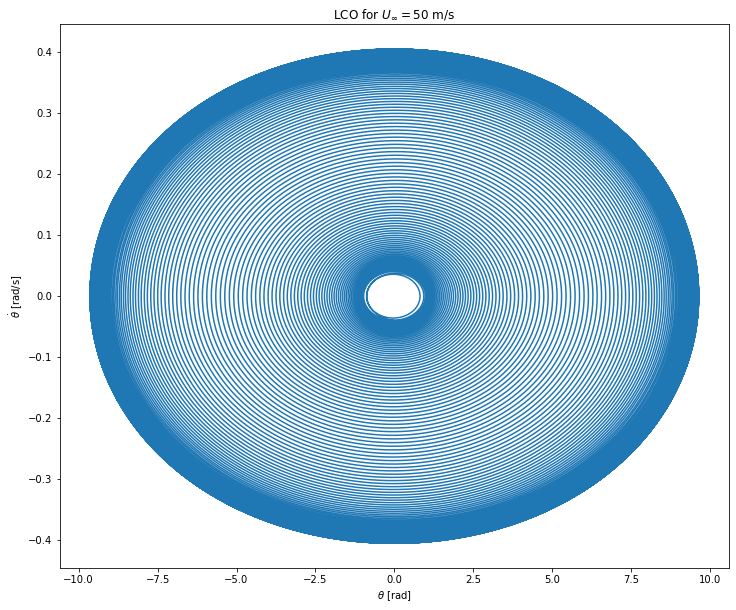

In [126]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(figsize=(12, 8))
plt.plot(RESPONSE['Plunge'], RESPONSE['DPlunge'])
plt.title('LCO for $U_{\infty} = 50$ m/s') #LOC for U 0 50
plt.xlabel(r'$\eta$ [m]')  #eta
plt.ylabel(r'$\dot{\eta}$ [m/s]')  #eta prikk
fig.savefig('./figures/LCO_plunge.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(figsize=(12, 8))
plt.plot(RESPONSE['Pitching'], RESPONSE['DPitching'])
plt.title('LCO for $U_{\infty} = 50$ m/s') #LOC for U 0 50
plt.xlabel(r'$\theta$ [rad]')  #delta
plt.ylabel(r'$\dot{\theta}$ [rad/s]')  #delta prikk
fig.savefig('./figures/LCO_pitching.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show

### Bifurcation curve

In [127]:
# DATA
DATA = {
    'C': 18.288,  # Wing chord
    'kh': 9.9818e+3,  # Linear plunge spring stiffness
    'kt': 1.614834e+6,  # Linear pitching spring stiffness
    'm': 12879.8,  # Mass per unit length
    'Ip': 6.7005e+5,  # Wing mass moment of inertia
    'dh': 0,  # Plunge damping coefficient
    'dt': 0,  # Pitching damping coefficient
    'khc': 0,  # Cubic plunge spring stiffness
    'ktc': 1.5 * 1.614834e+6,  # Cubic pitching spring stiffness, adjusted from DATA['kt']
    'xs': 1.0,  # Elastic axis dimensionless distance from the leading edge
    'xa': 0,  # Distance between the elastic axis and mass center
    # 'U': 48.92,  # Free-stream velocity
    # 'U': 48.93,  # Free-stream velocity Flutter
    'U': 50,  # Free-stream velocity

    'Rhoinf': 1.225,  # Air density
}

# Dimensionless quantities
Wh = np.sqrt(DATA['kh'] / DATA['m'])
Wt = np.sqrt(DATA['kt'] / DATA['Ip'])


In [128]:
DATA.update({
    'Xi_h': DATA['dh'] / (2 * np.sqrt(DATA['m'] * DATA['kh'])),
    'Xi_a': DATA['dt'] / (2 * np.sqrt(DATA['Ip'] * DATA['kt'])),
    'mu': DATA['m'] / (np.pi * DATA['Rhoinf'] * (DATA['C'] / 2) ** 2),
    'ra': np.sqrt(DATA['Ip'] / (DATA['m'] * (DATA['C'] / 2) ** 2)),
    'ah': DATA['xs'] - 1,
    'Omb': Wh / Wt,
    'Beta': DATA['ktc'] / DATA['kt'],
    'Gamma': DATA['khc'] / DATA['kh'],
    'Uinf': DATA['U'] / (DATA['C'] / 2 * Wt),
    'Psi1': 0.165,
    'Psi2': 0.335,
    'Eps1': 0.0455,
    'Eps2': 0.3,
})
print(DATA)

{'C': 18.288, 'kh': 9981.8, 'kt': 1614834.0, 'm': 12879.8, 'Ip': 670050.0, 'dh': 0, 'dt': 0, 'khc': 0, 'ktc': 2422251.0, 'xs': 1.0, 'xa': 0, 'U': 50, 'Rhoinf': 1.225, 'Xi_h': 0.0, 'Xi_a': 0.0, 'mu': 40.02678635055229, 'ra': 0.7887926019833397, 'ah': 0.0, 'Omb': 0.5670737389360186, 'Beta': 1.5, 'Gamma': 0.0, 'Uinf': 3.522276541026609, 'Psi1': 0.165, 'Psi2': 0.335, 'Eps1': 0.0455, 'Eps2': 0.3}


In [129]:
def solve_dynamics(DATA):
    NUM = {
    'DT': 0.01,  # Time step
    'TFinal': 4000,  # Simulation time
    'CI': [0, 1 * np.pi / 180, 0, 0],  # Initial conditions
    }
    # Solution procedure
    Tspan = (0, NUM['TFinal'])
    CInitial = NUM['CI'] + [0, 0, 0, 0]

    Term = matrices(DATA)  # Assuming the matrices function is defined

    def ode_system(t, Z):
        return func(t, Z, DATA, Term, NUM)  # Assuming the func function is defined

    solution = solve_ivp(ode_system, Tspan, CInitial, method='RK45',
                     t_eval=np.arange(Tspan[0], Tspan[1]+NUM['DT'], NUM['DT']))
    return solution

In [130]:
def simulate_response(DATA):
    solution = solve_dynamics(DATA)
    RESPONSE = {
    'Time': solution.t * DATA['C'] / 2 / DATA['U'],
    'Plunge': solution.y[0] * DATA['C'] / 2,
    'Pitching': solution.y[1] * 180 / np.pi,
    'DPlunge': solution.y[2] * (DATA['C'] / 2) ** 2 / DATA['U'],
    'DPitching': solution.y[3] * 180 / np.pi * DATA['C'] / 2 / DATA['U'],
    }
    # print(f"Velocity: {DATA['U']}, Max Plunge: {np.max(RESPONSE['Plunge'])}, Min Plunge: {np.min(RESPONSE['Plunge'])}")

    return RESPONSE

# def find_amplitude(velocities):
#     plunge_amplitudes = []
#     pitching_amplitudes = []

#     for velocity in velocities:
#         # DATA['U'] = velocity  # Update velocity in your DATA dictionary
#         # DATA['C'] = 18.288
#         # DATA = {'U': velocity, 'C': 18.288, 'TFinal': 10, 'DT': 0.1, 'CI': CInitial}  # Update appropriately
#         local_DATA = DATA.copy()  # Make a local copy of data
#         local_DATA['U'] = velocity  # Update velocity individually
#         local_DATA['Uinf'] = velocity / (local_DATA['C'] / 2 * np.sqrt(local_DATA['kt'] / local_DATA['Ip']))  # Recalculate based on current velocity
#         RESPONSE = simulate_response(DATA)  # This should include model calculations
#         plunge_amplitude = np.max(RESPONSE['Plunge']) - np.min(RESPONSE['Plunge'])
#         pitching_amplitude = np.max(RESPONSE['Pitching']) - np.min(RESPONSE['Pitching'])
        
#         plunge_amplitudes.append(plunge_amplitude)
#         pitching_amplitudes.append(pitching_amplitude)

#     return plunge_amplitudes, pitching_amplitudes
def find_amplitude(velocities):
    plunge_amplitudes = []
    pitching_amplitudes = []

    # for velocity in velocities:
    for i, velocity in enumerate(velocities):
        # print(f"Processing velocity {velocity} ({i+1}/{len(velocities)})")
        DATA['U'] = velocity  # Update velocity individually
        DATA['Uinf'] = velocity / (DATA['C'] / 2 * np.sqrt(DATA['kt'] / DATA['Ip']))  # Recalculate based on current velocity
        RESPONSE = simulate_response(DATA)  # This should include model calculations
        plunge_amplitude = np.max(RESPONSE['Plunge']) - np.min(RESPONSE['Plunge'])
        pitching_amplitude = np.max(RESPONSE['Pitching']) - np.min(RESPONSE['Pitching'])
        
        plunge_amplitudes.append(plunge_amplitude)
        pitching_amplitudes.append(pitching_amplitude)
        # print(f"Finished velocity {velocity}")

    return plunge_amplitudes, pitching_amplitudes


velocities = np.arange(1, 81)
print(velocities)


# Find amplitudes
plunge_amplitudes, pitching_amplitudes = find_amplitude(velocities)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10), sharex=True)
# plt.figure(figsize=(10, 5))
plt.plot(velocities, plunge_amplitudes, label='Plunge Amplitude')
plt.plot(velocities, pitching_amplitudes, label='Pitching Amplitude')
plt.xlabel('Velocity [m/s]')
plt.ylabel('Amplitude [m]')
plt.title('Bifurcation curve')
plt.legend()
plt.grid(True)
fig.savefig('./figures/Bifurcation_curve.pdf', dpi = 200, transparent=False, bbox_inches='tight')
plt.show()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80]
